# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# creating dataframe


In [6]:
dataframe=pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [8]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# convert the data type -rate

In [10]:
def handleRate(value):
    value=str(value).split("/")
    value=value[0]
    return float(value)

dataframe["rate"]=dataframe["rate"].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# types of restaurant

In [11]:
dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


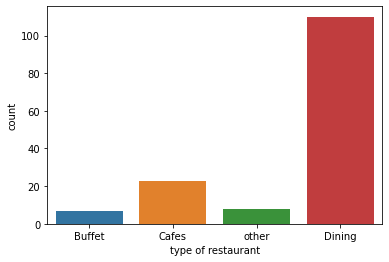

In [12]:
sns.countplot(x=dataframe["listed_in(type)"])
plt.xlabel("type of restaurant")
plt.show()


# conclusion-majority of restaurant are in dining category

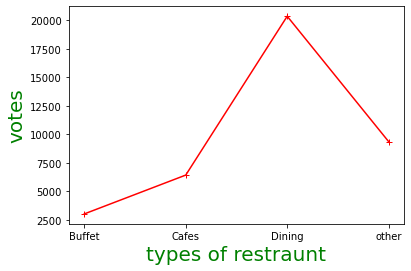

In [19]:
grouped_data=dataframe.groupby("listed_in(type)")["votes"].sum()
result=pd.DataFrame({"votes":grouped_data})
plt.plot(result,c="red",marker='+')
plt.xlabel("types of restraunt",c="green",size=20)
plt.ylabel("votes",c="green",size=20)
plt.show()

# verdict-dining restaurant recieved max votes

In [20]:
dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


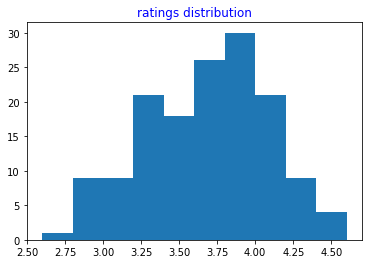

In [25]:
plt.hist(dataframe["rate"],bins=10)
plt.title("ratings distribution",c="blue")
plt.show()

# conclusion-mjaority restaurant recived rating between 3.75 and 4 

# average order spending by couples

In [26]:
dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


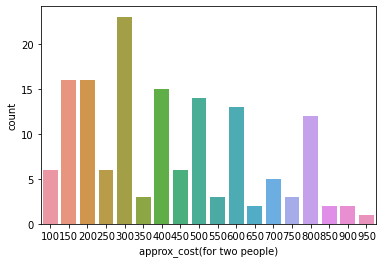

In [28]:
couple_data=dataframe["approx_cost(for two people)"]
sns.countplot(x=couple_data)
plt.show()

# most couple spend worth orders of rs 300

# mode with higher ratings

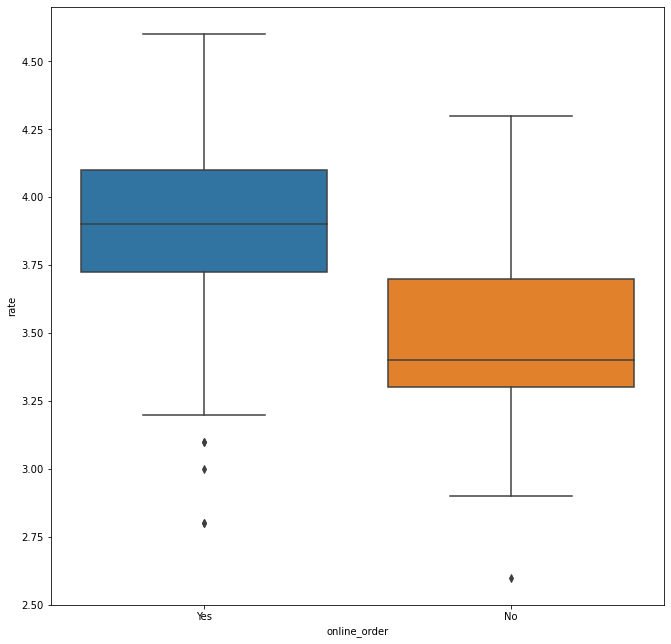

In [33]:
plt.figure(figsize= (11,11))
sns.boxplot(x="online_order",y='rate',data=dataframe)
plt.show()


# conclusion-offline orders got lower ratings compared to online

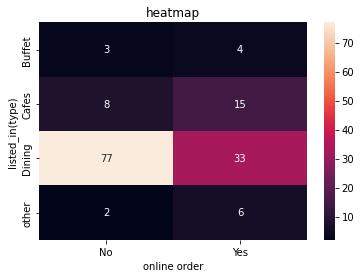

In [36]:
pivot_table=dataframe.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size",fill_value=0)
sns.heatmap(pivot_table,annot=True,fmt='d')
plt.title("heatmap")
plt.xlabel("online order")
plt.ylabel("listed_in(type)")
plt.show()


# conclusion-people prefer ordering more online at cafe buffet and others whereas they prefer onrdering online for dining 